## Portfolio Project: Exploratory Data Analysis with Retail Data

##### <font color="black"><b>Data source: "https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset"<b></font>

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns                       
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

### <font color="Orange"><b>Loading & Cleaning The Data<b></font>

In [2]:
source = 'C:/Users/hlyhe/Downloads/customer_shopping_data.xlsx'

raw_data = pd.read_excel(source)
raw_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28.0,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21.0,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20.0,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66.0,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53.0,Books,4,60.60,Cash,2021-10-24,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,NaN,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,I325143,C569580,Male,NaN,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,I824010,C103292,Male,NaN,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
99455,I702964,C800631,Male,NaN,Technology,4,4200.00,Cash,2021-03-16,Istinye Park


#### <font color="Orange"><b>-> Explore the table to get a sensing of the dataset<b></font>

In [3]:
def dataset_summary(df):
    summary = pd.DataFrame()

    # Data type for each column
    summary['Data Type'] = df.dtypes

    # Null count for each column
    summary['Null Count'] = df.isnull().sum()

    # Total count for each column
    summary['Total Count'] = df.count()

    # Distinct count for each column
    summary['Distinct Count'] = df.nunique()

    # Top 5 distinct values for each column
    top_values = {}
    for col in df.columns:
        top_values[col] = df[col].value_counts().nlargest(5).index.tolist()
    summary['Top 5 Distinct Values'] = pd.Series(top_values)

    return summary

summary_df = dataset_summary(raw_data)
display(summary_df)

,Data Type,Null Count,Total Count,Distinct Count,Top 5 Distinct Values
invoice_no,object,0,99457,99457,"[I138884, I291671, I175779, I226143, I683818]"
customer_id,object,0,99457,99457,"[C241288, C116138, C382765, C285074, C405356]"
gender,object,0,99457,2,"[Female, Male]"
age,float64,211,99246,52,"[37.0, 22.0, 64.0, 43.0, 51.0]"
category,object,0,99457,8,"[Clothing, Cosmetics, Food & Beverage, Toys, S..."
quantity,int64,0,99457,5,"[3, 5, 2, 1, 4]"
price,float64,0,99457,40,"[600.16, 1500.4, 900.24, 1200.32, 300.08]"
payment_method,object,0,99457,3,"[Cash, Credit Card, Debit Card]"
invoice_date,datetime64[ns],0,99457,797,"[2021-11-24 00:00:00, 2023-02-26 00:00:00, 202..."
shopping_mall,object,0,99457,10,"[Mall of Istanbul, Kanyon, Metrocity, Metropol..."


Taking a quick look at the data, every single row entry has a distinct 'invoice_no' and 'customer_id', hence these 2 columns can be ignored.

In addition, there are 3 variables (age, quantity & price) numeric in nature and only 'age' has missing/null values which we will decide to fill or drop by taking a deeper look into the data.

#### <font color="Orange"><b>-> For the 3 numeric variables (age, quantity & price), we shall take a further look:<b></font>

##### <font color="Orange"><b>a. Central tendency and dispersion<b></font>

In [4]:
raw_data[['age','quantity','price']].describe()

,age,quantity,price
count,99246.000000,99457.000000,99457.000000
mean,43.427090,3.003429,689.256321
std,14.990273,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


##### <font color="Orange"><b>b. Univariate Analysis (Single Variable)<b></font>

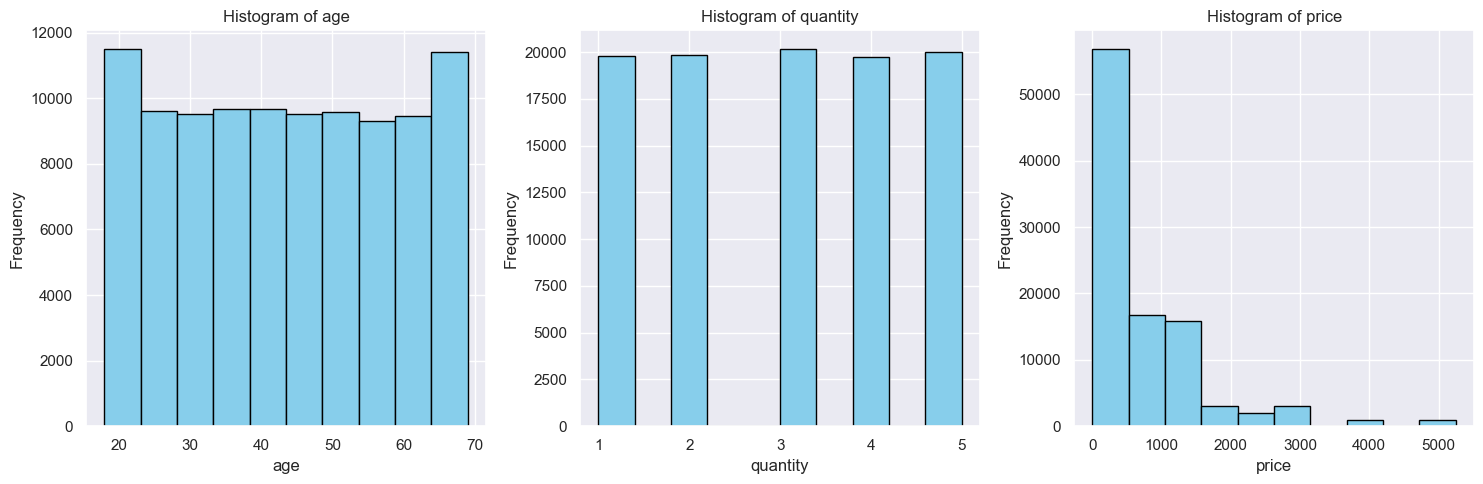

In [5]:
# HISTOGRAMS
def plot_histograms(df, columns):
    # Check if specified columns exist in the DataFrame
    columns = [col for col in columns if col in df.columns]
    
    # Determine the number of columns for the 1xN layout
    num_columns = len(columns)
    
    # Create a subplot with 1 row and multiple columns
    fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 5))

    # If there's only one column, axes will not be an array, so handle that case
    if num_columns == 1:
        axes = [axes]

    # Plot a histogram for each specified column
    for i, column in enumerate(columns):
        axes[i].hist(df[column].dropna(), bins=10, color='skyblue', edgecolor='black')
        axes[i].set_title(f"Histogram of {column}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Frequency")
        axes[i].grid(True)
    
    # Adjust layout to ensure titles, labels, and grids fit properly
    plt.tight_layout()
    plt.show()

columns_to_plot = ['age', 'quantity', 'price']
plot_histograms(raw_data, columns_to_plot)

##### <font color="Orange"><b>c. Bivariate Analysis (Relation between Variables)<b></font>

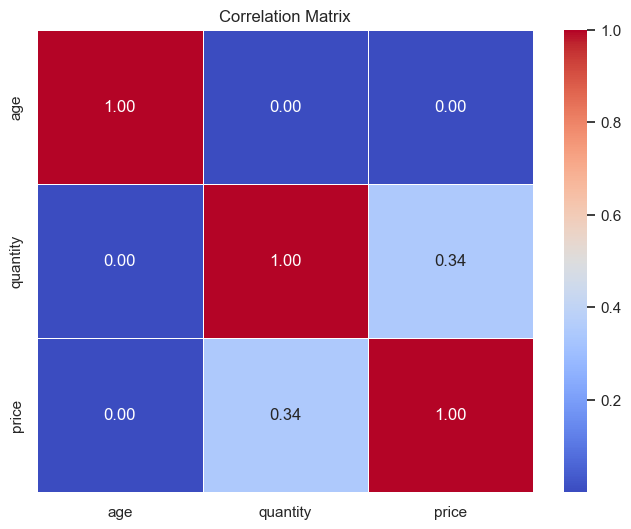

In [6]:
# CORRELATION MATRIX
def plot_correlation_matrix(df, columns):
    columns = [col for col in columns if col in df.columns]
    
    # Calculate the correlation matrix for the selected columns
    corr_matrix = df[columns].corr()
    
    # Plot the correlation matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

columns_to_plot = ['age', 'quantity', 'price']
plot_correlation_matrix(raw_data, columns_to_plot)

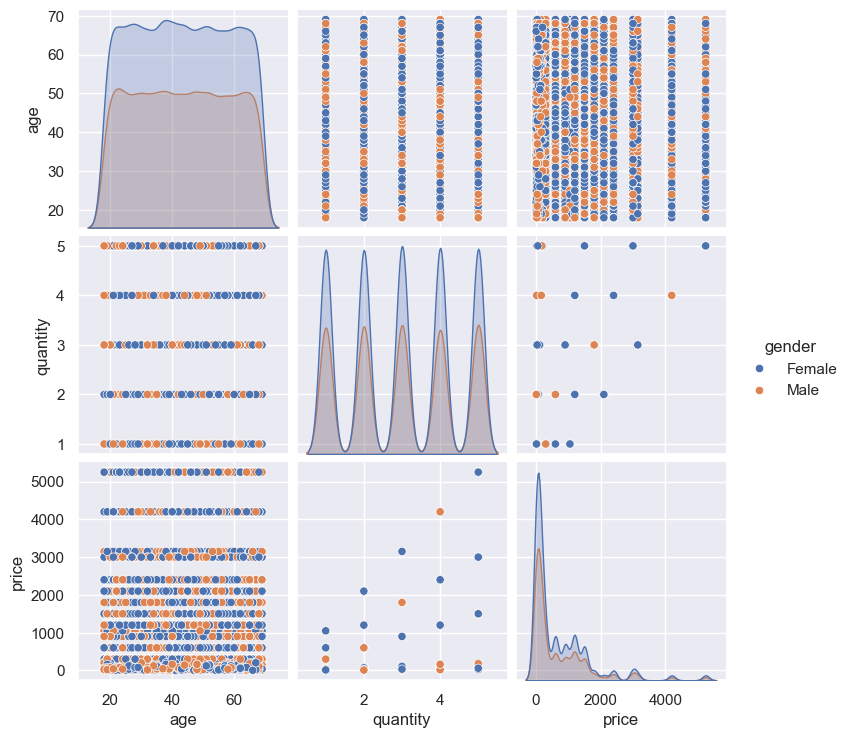

In [7]:
# PAIRPLOT
sns.pairplot(raw_data, hue='gender') # color coding 'gender' to see any noticeable differences between F & M
plt.show()

From the visualizations above, there seem to be no discernable relations between the numeric variables and nothing stands out individually except the observation from the pairplots that female shoppers outnumber males and generally spend more.

So how to decide if we drop or fill the missing age values? Given the number of nulls (211 out of >90000) represents less than 0.2% of the population, a case can be made to drop the rows of the missing variables 'dropna()'. But for the purpose of this exercise, we shall aim to preserve the data in its entirety and attempt to fill it with a reasonable value. Analysing further, let us see if any categorical variables shows any impact on age:

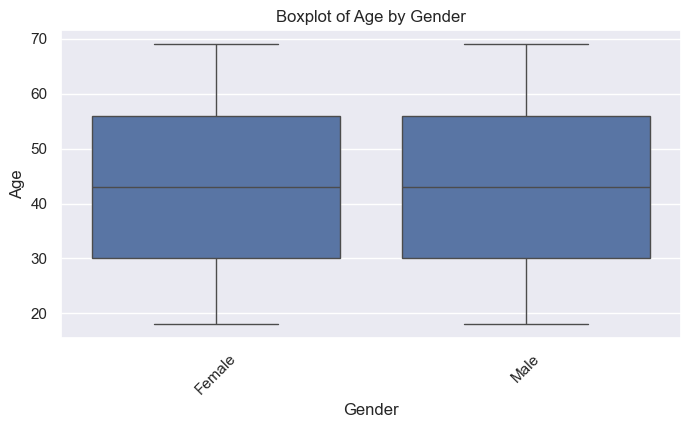

In [8]:
# BOXPLOT 1
plt.figure(figsize=(8, 4))  # Set size of plot
sns.boxplot(x='gender', y='age', data=raw_data)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Boxplot of Age by Gender')
plt.xticks(rotation=45)
plt.show()

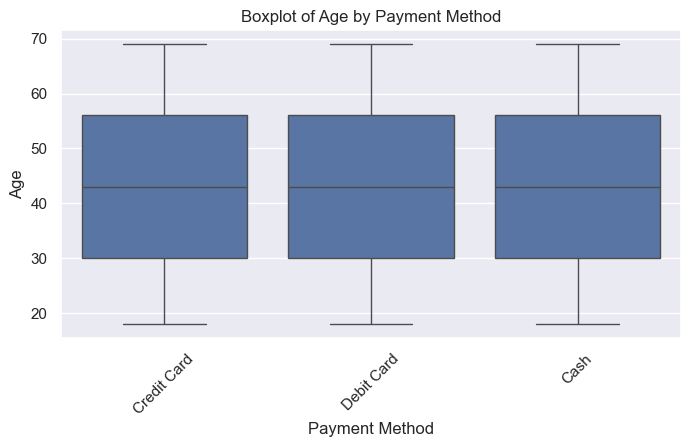

In [9]:
# BOXPLOT 2
plt.figure(figsize=(8, 4)) 
sns.boxplot(x='payment_method', y='age', data=raw_data)

plt.xlabel('Payment Method')
plt.ylabel('Age')
plt.title('Boxplot of Age by Payment Method')
plt.xticks(rotation=45)
plt.show()

It would seem that neither 'gender' nor the type of 'payment method' have any obvious relationship to the 'age' of a shopper as the result is not significant given the sizable overlap among the Inter Quartile Ranges (IQR).

In this case, let us fill in the missing ages using the median age 43 (which coincidentally is also equal to the mean).

#### <font color="Orange"><b>-> Filling null values<b></font>

In [10]:
raw_data['age'] = raw_data['age'].fillna(43)
raw_data.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Now the data has no more null values.

### <font color="Purple"><b>Analysing the Data<b></font>

Some of the potential questions we can answer are:
1. What were the busiest periods in terms of sales?
2. Which are the top selling categories & malls?
3. Are there any spending patterns of the different customer segments?

#### <font color="Purple"><b>-> Busiest period of sales<b></font>

##### <b>Since the data is only complete for 2 calender years, 2021 & 2022, we will work within this period for the analysis<b>

In [11]:
start_date = '2021-01'
end_date = '2022-12'

##### <b>Start by calculating sales (Quantity x Price)<b>

In [12]:
raw_data['sales'] = raw_data['quantity'] * raw_data['price']

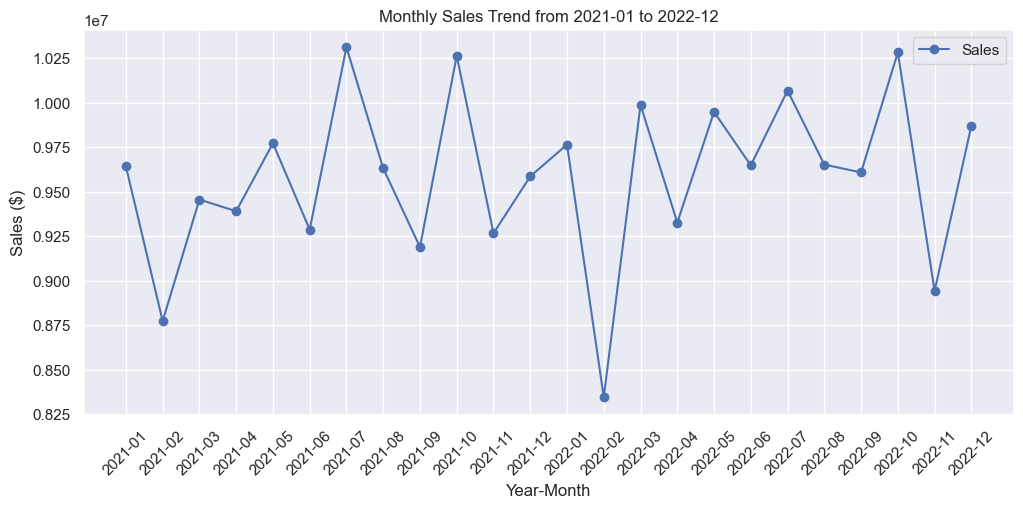

In [13]:
# Group by Year-Month and sum sales
monthly_sales = raw_data.groupby(raw_data['invoice_date'].dt.to_period('M'))['sales'].sum().reset_index()

# Convert period back to string for filtering and plotting
monthly_sales['invoice_date'] = monthly_sales['invoice_date'].astype(str)

# Filter data within the period
filtered_sales = monthly_sales[(monthly_sales['invoice_date'] >= start_date) & (monthly_sales['invoice_date'] <= end_date)]

plt.figure(figsize=(12, 5))
plt.plot(filtered_sales['invoice_date'], filtered_sales['sales'], marker='o', linestyle='-', color='b', label='Sales')

plt.title(f"Monthly Sales Trend from {start_date} to {end_date}")
plt.xlabel("Year-Month")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

For the 2 years (2021 & 2022), the highest month of sales for the malls in Istanbul were July and October for both years. Possibly attributed to July being the peak tourist period in the summer and the republic day celebrations for Turkey in October.

In addition, the lowest sales month was February in both years likely due to seasonal effects of the post-holiday slump.

##### <b>Next we take alook if any day of the week has better sales:

C:\Users\hlyhe\AppData\Local\Temp\ipykernel_27352\2275573254.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['day_of_week'] = filtered_data['invoice_date'].dt.day_name()


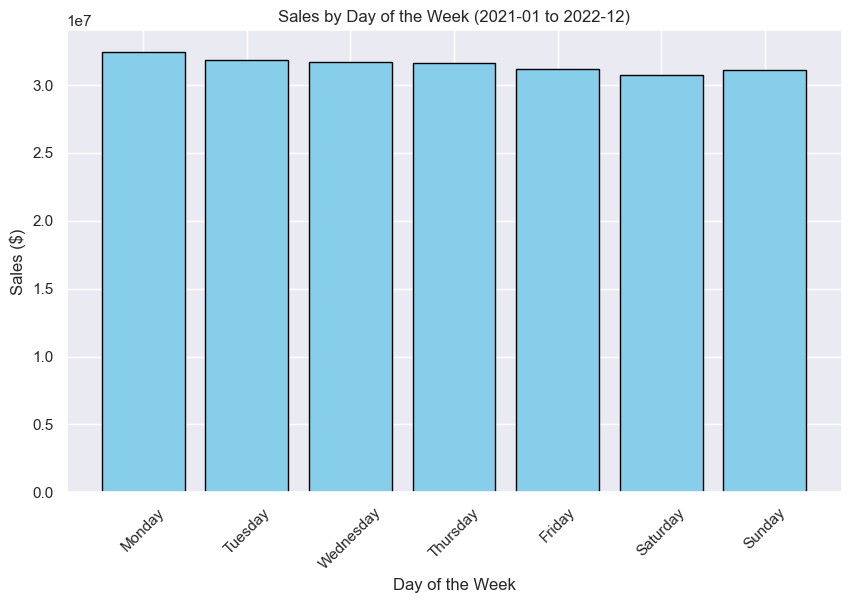

In [14]:
# Filter data within the specified period
filtered_data = raw_data[(raw_data['invoice_date'] >= start_date) & (raw_data['invoice_date'] <= end_date)]

# Create a new column for day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
filtered_data['day_of_week'] = filtered_data['invoice_date'].dt.day_name()

# Group by the day of the week and sum sales
day_sales = filtered_data.groupby('day_of_week')['sales'].sum().reset_index()

# Reorder days of the week to ensure correct order (Monday, Tuesday, ..., Sunday)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales['day_of_week'] = pd.Categorical(day_sales['day_of_week'], categories=ordered_days, ordered=True)
day_sales = day_sales.sort_values('day_of_week')

plt.figure(figsize=(10, 6))
plt.bar(day_sales['day_of_week'], day_sales['sales'], color='skyblue', edgecolor='black')

plt.title(f"Sales by Day of the Week ({start_date} to {end_date})")
plt.xlabel("Day of the Week")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

It would seem that over the period of 2 years, no particular day in the week stands out with higher sales.

#### <font color="Purple"><b>-> Top Categories & Malls<b></font>

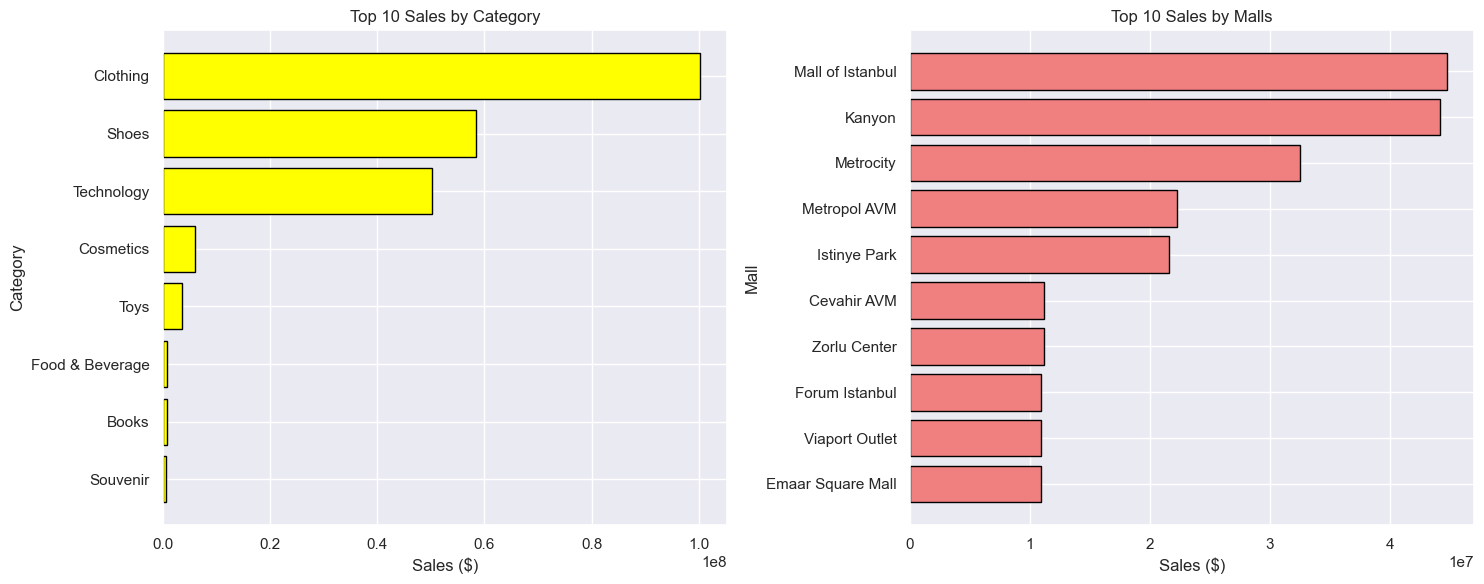

In [15]:
# Group by category and sum sales
category_sales = filtered_data.groupby('category')['sales'].sum().reset_index()
category_sales = category_sales.sort_values('sales', ascending=False)

# Group by malls and sum sales
mall_sales = filtered_data.groupby('shopping_mall')['sales'].sum().reset_index()
mall_sales = mall_sales.sort_values('sales', ascending=False)

# Create subplots with 1 row, 2 columns for side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot bar chart for top sales by category (Largest sales on top)
axes[0].barh(category_sales['category'], category_sales['sales'], color='yellow', edgecolor='black')
axes[0].set_title('Top 10 Sales by Category')
axes[0].set_xlabel('Sales ($)')
axes[0].set_ylabel('Category')
axes[0].invert_yaxis()  # Invert y-axis to have largest at the top
axes[0].grid(True)

# Plot bar chart for top sales by malls (Largest sales on top)
axes[1].barh(mall_sales['shopping_mall'], mall_sales['sales'], color='lightcoral', edgecolor='black')
axes[1].set_title('Top 10 Sales by Malls')
axes[1].set_xlabel('Sales ($)')
axes[1].set_ylabel('Mall')
axes[1].invert_yaxis()  # Invert y-axis to have largest at the top
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### <font color="Purple"><b>-> Customer Segments<b></font>

##### <b>Firstly lets apply a segmentation to the customer's age.<b>

In [16]:
# Define the age bins and labels
bins = [0, 29, 39, 49, float('inf')]  # Define bin edges
labels = ['<30', '30-39', '40-49', '>=50']  # Define corresponding labels

raw_data['age_segment'] = pd.cut(raw_data['age'], bins=bins, labels=labels, right=True)

C:\Users\hlyhe\AppData\Local\Temp\ipykernel_27352\1718504997.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_sales = filtered_data.groupby(['age_segment', 'category'])['sales'].sum().reset_index()


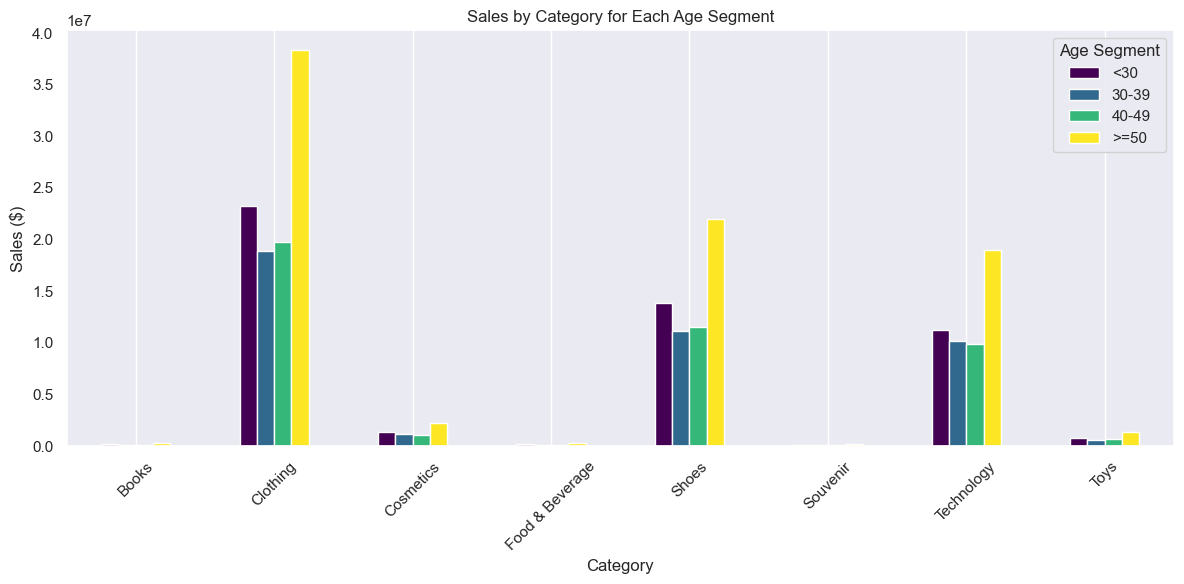

In [17]:
# Filter data within the specified period
filtered_data = raw_data[(raw_data['invoice_date'] >= start_date) & (raw_data['invoice_date'] <= end_date)]

# Group by 'age_segment' and 'category', summing the 'sales'
age_category_sales = filtered_data.groupby(['age_segment', 'category'])['sales'].sum().reset_index()

# Pivot for easier plotting
pivot_data = age_category_sales.pivot(index='category', columns='age_segment', values='sales')

# Plot grouped bar chart
pivot_data.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Customize chart
plt.title("Sales by Category for Each Age Segment")
plt.xlabel("Category")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Age Segment")  # Add legend for age segments
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

From the chart above, "Clothing" was the highest sales by category and also the highest spending for all age segments. Evidently, the age group of more than 50 years spent the most compared to the other age segments which is logical given the most senior age group would also be expected to have the highest spending power. Interestingly, the second highest spending group actually belonged to the youngest age segment of below 30 years which possibly points to them having less commitments and more time to shop than those between the ages 30 - 50 years.   

##### <b>Next lets separate the data by gender to check for other insights<b>

C:\Users\hlyhe\AppData\Local\Temp\ipykernel_27352\2755031323.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_sales = df.groupby(['age_segment', 'category'])['sales'].sum().reset_index()
C:\Users\hlyhe\AppData\Local\Temp\ipykernel_27352\2755031323.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_sales = df.groupby(['age_segment', 'category'])['sales'].sum().reset_index()


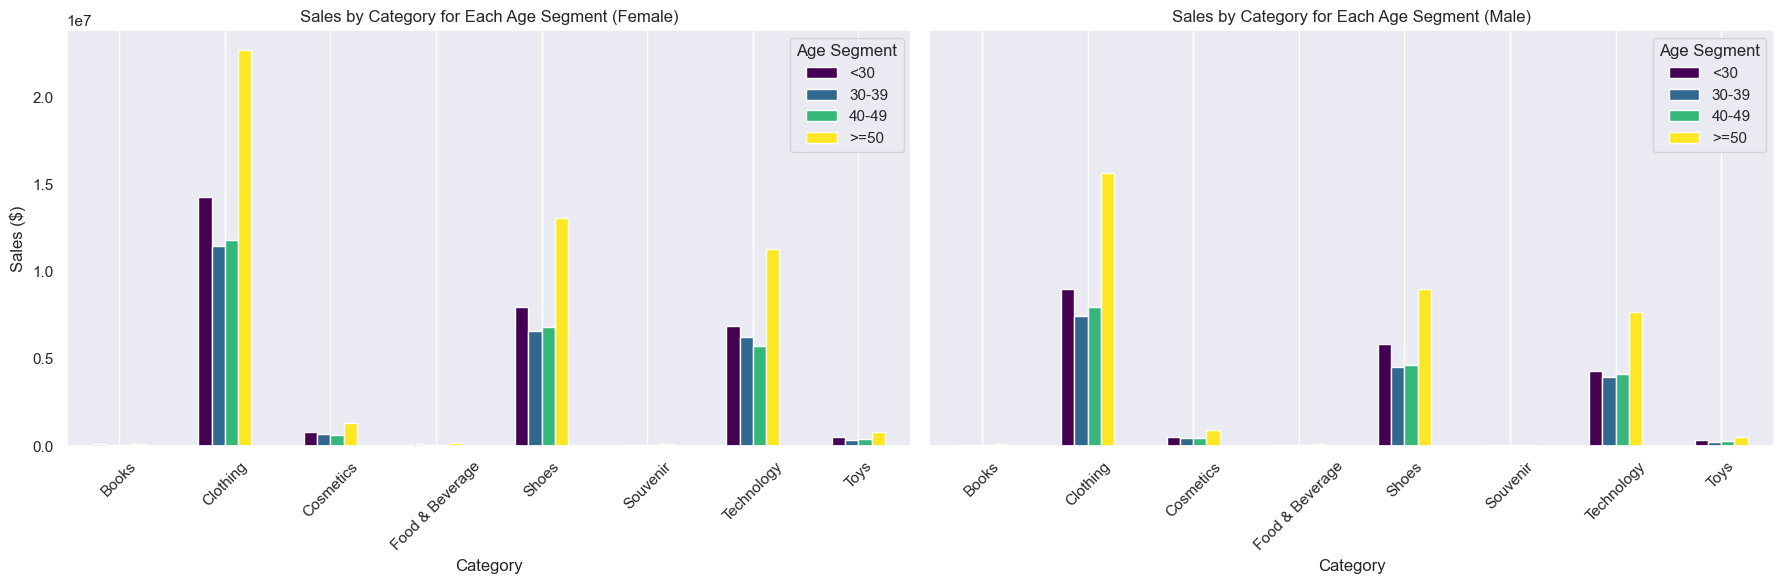

In [18]:
# Now lets separate the data by gender to check for other insights

female_data = filtered_data[filtered_data['gender'] == 'Female']
male_data = filtered_data[filtered_data['gender'] == 'Male']

# Function to process data
def process_data(df):
    grouped_sales = df.groupby(['age_segment', 'category'])['sales'].sum().reset_index()
    return grouped_sales.pivot(index='category', columns='age_segment', values='sales')

# Prepare data for male and female
female_pivot = process_data(female_data)
male_pivot = process_data(male_data)

# Create subplots: 1 row, 2 columns (Female on left, Male on right)
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Plot Female Data
female_pivot.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Sales by Category for Each Age Segment (Female)")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Sales ($)")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Age Segment")
axes[0].grid(axis='y')

# Plot Male Data
male_pivot.plot(kind='bar', ax=axes[1], colormap='viridis')
axes[1].set_title("Sales by Category for Each Age Segment (Male)")
axes[1].set_xlabel("Category")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="Age Segment")
axes[1].grid(axis='y')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

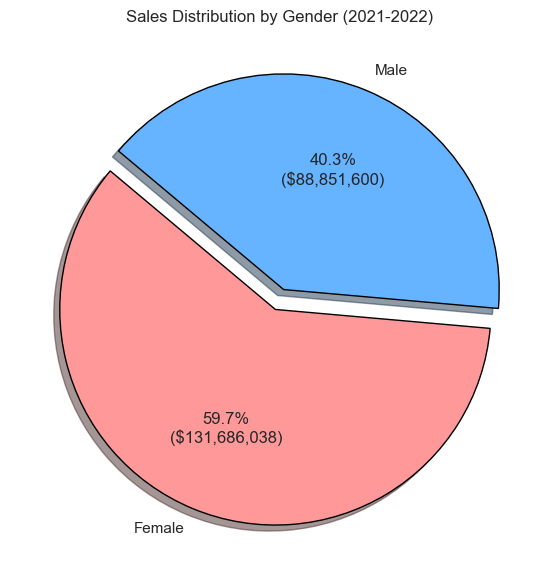

In [19]:
# Group sales by gender
gender_sales = filtered_data.groupby('gender')['sales'].sum()

# Convert to percentages
total_sales = gender_sales.sum()
gender_sales_percentage = (gender_sales / total_sales) * 100

# Define colors and explode effect
colors = ['#ff9999', '#66b3ff']  # Custom colors for Male & Female
explode = (0.05, 0.05)  # Slightly separate the slices

plt.figure(figsize=(7, 7))
plt.pie(gender_sales, labels=gender_sales.index, autopct=lambda p: f'{p:.1f}%\n(${p * total_sales / 100:,.0f})',
        startangle=140, colors=colors, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'})
plt.title("Sales Distribution by Gender (2021-2022)")
plt.show()

From the gender split of the category bar chart, both Females and Males appear to have similar spending patterns. However Females outspend Males across all age segments and account for 60% of total sales in the 2 year period (2021-2022).

##### <b>Now we check the spending behaviour for the different modes of payment<b>

C:\Users\hlyhe\AppData\Local\Temp\ipykernel_27352\1059122627.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_by_age = filtered_data.groupby(['age_segment', 'payment_method']).size().unstack()


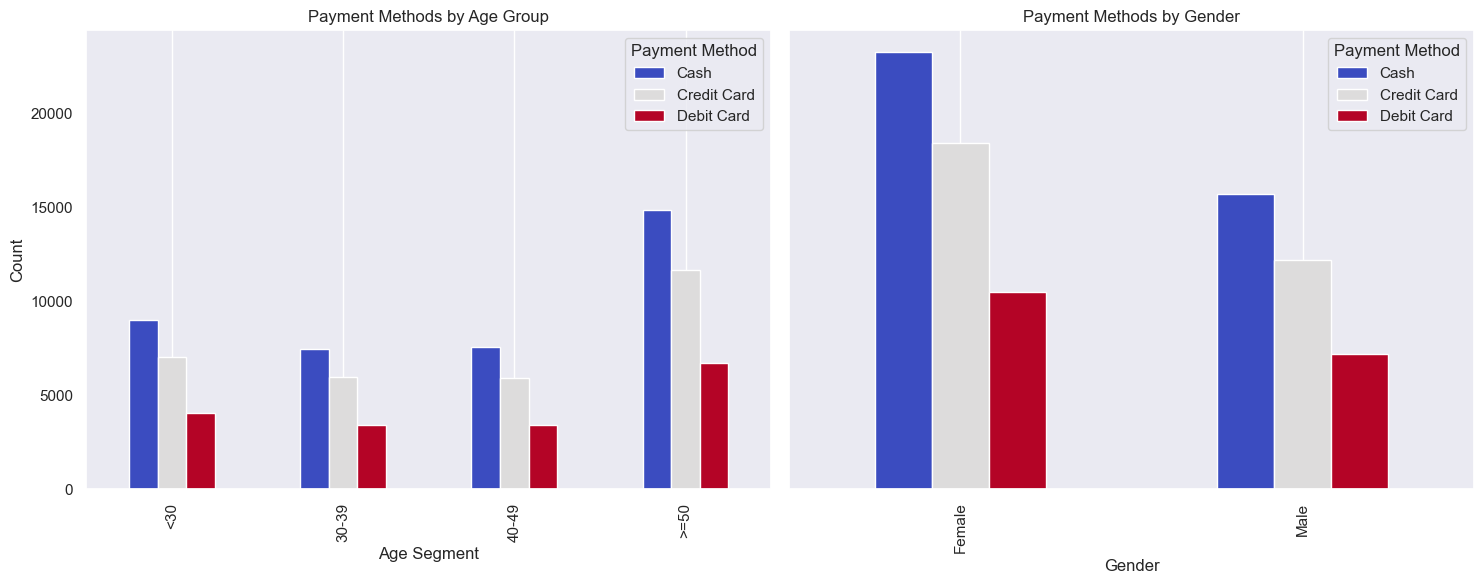

In [20]:
# Count of payment methods across age groups
payment_by_age = filtered_data.groupby(['age_segment', 'payment_method']).size().unstack()

# Count of payment methods across gender
payment_by_gender = filtered_data.groupby(['gender', 'payment_method']).size().unstack()

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot Payment Methods by Age Group
payment_by_age.plot(kind='bar', ax=axes[0], colormap='coolwarm')
axes[0].set_title("Payment Methods by Age Group")
axes[0].set_xlabel("Age Segment")
axes[0].set_ylabel("Count")
axes[0].legend(title="Payment Method")
axes[0].grid(axis='y')

# Plot Payment Methods by Gender
payment_by_gender.plot(kind='bar', ax=axes[1], colormap='coolwarm')
axes[1].set_title("Payment Methods by Gender")
axes[1].set_xlabel("Gender")
axes[1].legend(title="Payment Method")
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

Across all age groups and gender, cash was the preferred method of payment followed by credit and debit card respectively.

### <font color="Green"><b>Summary<b></font>

#### <font color="Green">A few insights we discerned from the data:
##### <font color="Green">1. Busiest periods appear to be in July and October, while lull was in February
##### <font color="Green">2. Clothing was by far the top selling category, Kanyon and Mall of Istanbul were the shopping malls with highest sales
##### <font color="Green">3. No spending behaviour stood out in particular but Females did outspend Males in general and accounted for 60% of total sales

### <font color="Blue"><b>Improvements<b></font>

#### <font color="Blue">Further insights we can potentially generate:
##### <font color="Blue">1. From the data we know that all customer_id were unique hence there were no repeat customers from this dataset, but we can also further explore the best selling categories within the different malls to see if a new product launch is best targeted at a single location or region
##### <font color="Blue">2. Although customer segmentation by age did not indicate anything revealing, however we can further breakdown into metrics such as average spend per customer in the different age segments that might give a better indication of spending power of the age groups given the data population was revealed to have more below 30s & above 50s shoppers which could have potentially skewed the results